In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("Nifty_Price.csv")

In [3]:
dataset.index = pd.to_datetime(dataset.Date)

In [7]:
df = dataset["Close"]['2021-01-01':'2021-12-31']

In [8]:
df1 = dataset["Close"]['2011-01-01':'2021-01-01']

In [9]:
df1.describe()

count     2444.000000
mean      8339.396833
std       2319.678336
min       4544.200195
25%       5943.762451
50%       8283.600097
75%      10477.000244
max      14018.500000
Name: Close, dtype: float64

In [10]:
df.describe()

count      246.000000
mean     16016.579844
std       1285.366991
min      13634.599609
25%      14868.962158
50%      15757.725098
75%      17304.799804
max      18477.050781
Name: Close, dtype: float64

In [11]:
df

Date
2021-01-01    14018.500000
2021-01-04    14132.900391
2021-01-05    14199.500000
2021-01-06    14146.250000
2021-01-07    14137.349609
                  ...     
2021-12-23    17072.599609
2021-12-24    17003.750000
2021-12-27    17086.250000
2021-12-28    17233.250000
2021-12-29    17213.599609
Name: Close, Length: 246, dtype: float64

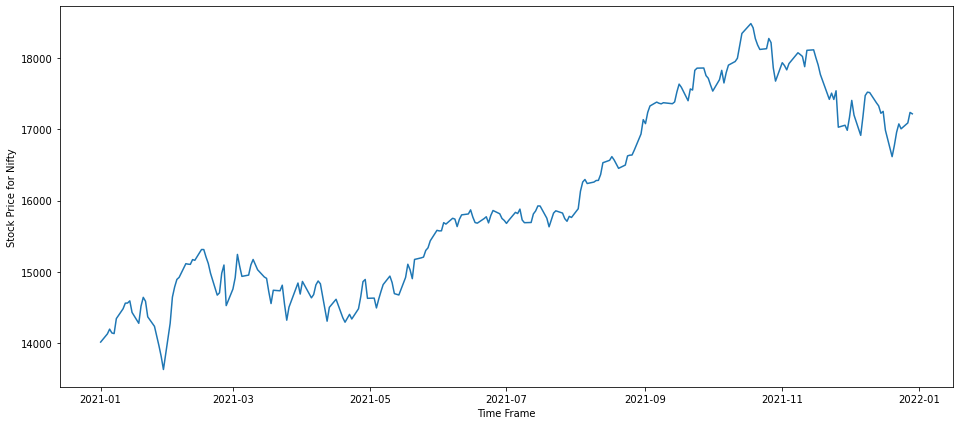

In [12]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for Nifty')
ax1.plot(df)

Cheking stationarity
1)Duckey Fuller test
2)Rolling statistics

In [13]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -1.2432075857301275
ADF p-values: 0.654738374294058
ADF number of lags used: 4
ADF number of observations: 241
ADF critical values: {'1%': -3.4577787098622674, '5%': -2.873608704758507, '10%': -2.573201765981991}
ADF best information criterion: 2952.898523066787


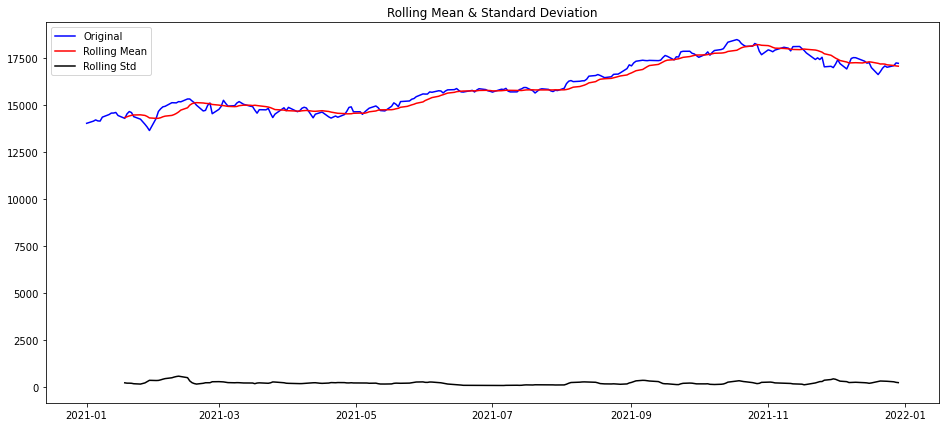

In [14]:
#Determing rolling statistics
rolLmean = df.rolling(12).mean()
rolLstd = df.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Making series stationary by converting it into logarithmic format

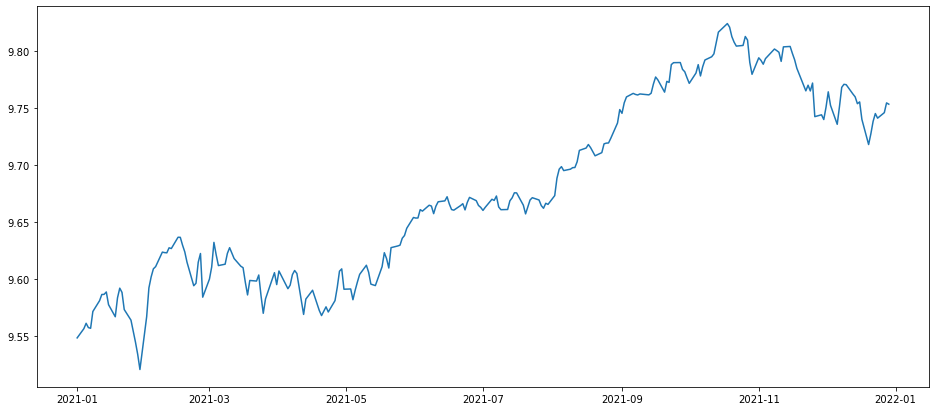

In [15]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(df)
plt.plot(ts_log)

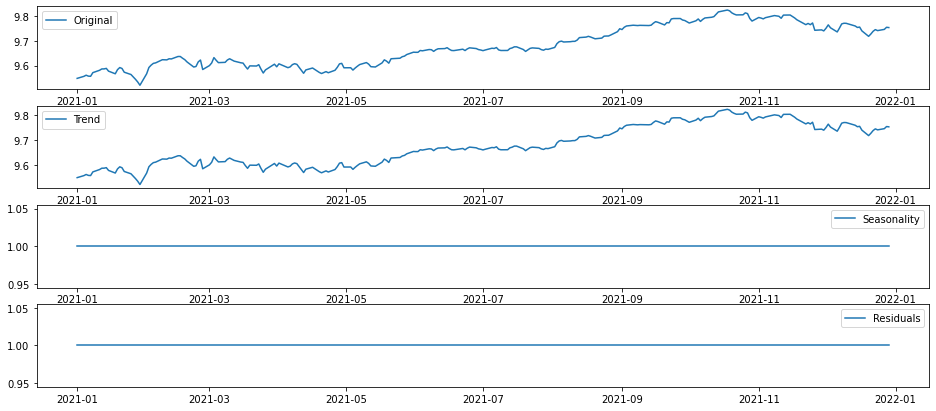

In [16]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,period = 1, model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

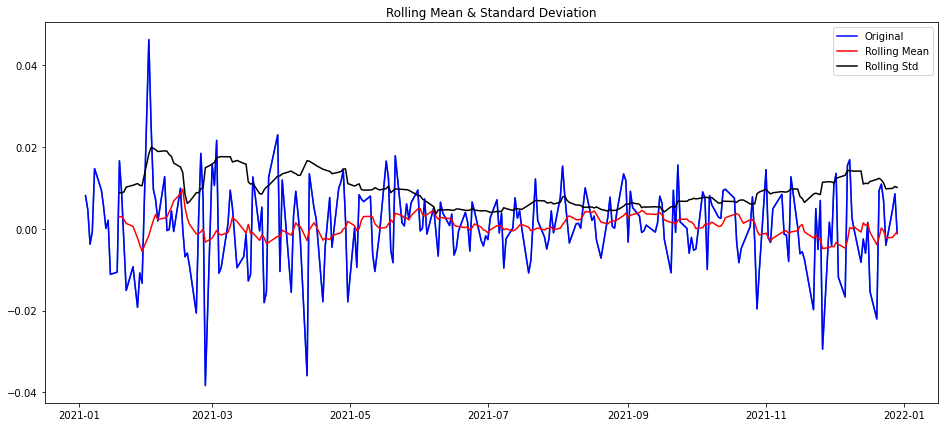

In [17]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [18]:
df.sort_index(inplace=True)

In [19]:
df

Date
2021-01-01    14018.500000
2021-01-04    14132.900391
2021-01-05    14199.500000
2021-01-06    14146.250000
2021-01-07    14137.349609
                  ...     
2021-12-23    17072.599609
2021-12-24    17003.750000
2021-12-27    17086.250000
2021-12-28    17233.250000
2021-12-29    17213.599609
Name: Close, Length: 246, dtype: float64

In [20]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


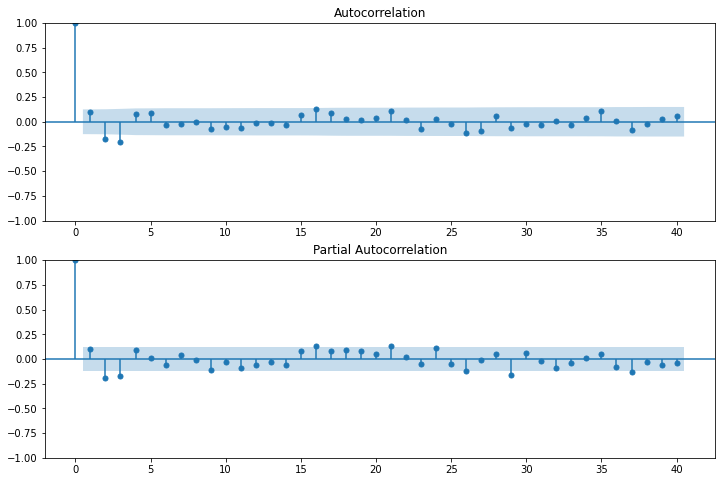

In [21]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  245
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 778.322
Date:                Fri, 10 Jun 2022   AIC                          -1550.644
Time:                        11:37:27   BIC                          -1540.152
Sample:                             0   HQIC                         -1546.419
                                - 245                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1074      0.052      2.050      0.040       0.005       0.210
ma.L1         -0.9998      1.122     -0.891      0.373      -3.198       1.199
sigma2      9.706e-05      0.000      0.902      0.3

C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


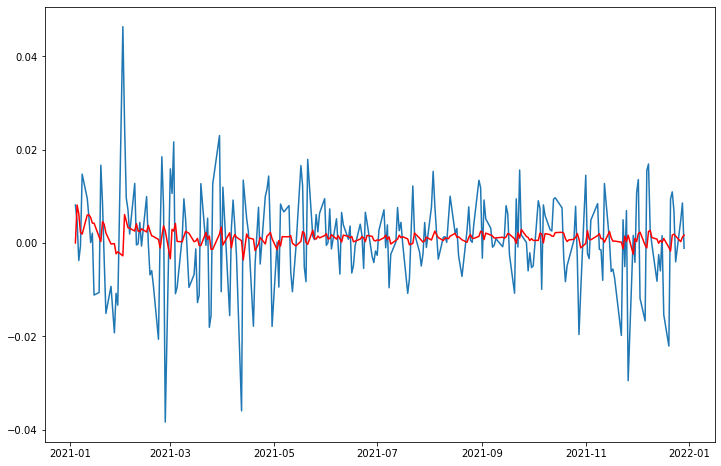

In [24]:


mod = sm.tsa.arima.ARIMA(ts_log_diff, order=(1, 1, 1))
res = mod.fit()
print(res.summary())
fig = plt.figure(figsize=(12,8))
plt.plot(ts_log_diff)
plt.plot(res.fittedvalues, color='red')

Taking results back to the original scale

In [25]:
##Making fitted values in series
ARIMA_diff_predictions = pd.Series(res.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2021-01-04    0.000000
2021-01-05    0.008128
2021-01-06    0.006230
2021-01-07    0.002240
2021-01-08    0.001899
dtype: float64


In [26]:
#taking cumulative sum of fitted values
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2021-01-04    0.000000
2021-01-05    0.008128
2021-01-06    0.014358
2021-01-07    0.016598
2021-01-08    0.018497
dtype: float64


In [27]:
#adding it to reverse the differecing step
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2021-01-01    9.548133
2021-01-04    9.548133
2021-01-05    9.556261
2021-01-06    9.562491
2021-01-07    9.564731
dtype: float64

Text(0.5, 1.0, 'RMSE: 904.1561')

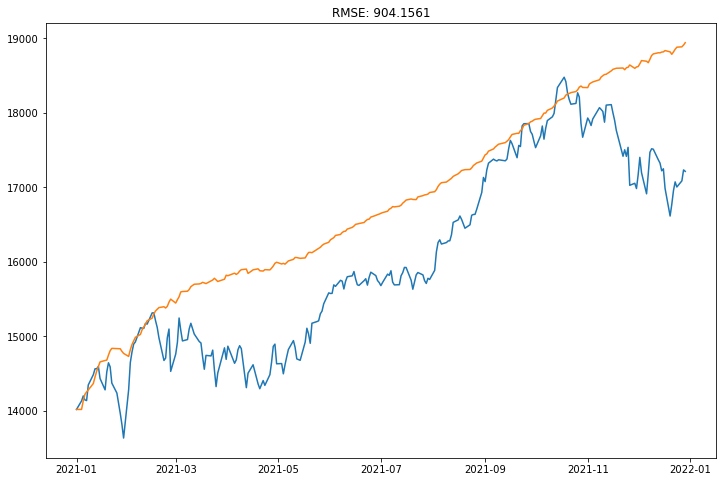

In [28]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(df)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df)**2)/len(df)))

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [30]:
# report performance
mse = mean_squared_error(predictions_ARIMA, df)
print('MSE: '+str(mse))
mae = mean_absolute_error(predictions_ARIMA, df)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(predictions_ARIMA, df))
print('RMSE: '+str(rmse))

MSE: 817498.3078522861
MAE: 753.2196686686725
RMSE: 904.156130240948


In [31]:
res.predict(10,20)

Date
2021-01-18    0.001314
2021-01-19    0.000310
2021-01-20    0.004576
2021-01-21    0.003991
2021-01-22    0.002140
2021-01-25   -0.000212
2021-01-27   -0.000149
2021-01-28   -0.002326
2021-01-29   -0.001882
2021-02-01   -0.002749
2021-02-02    0.006086
Name: predicted_mean, dtype: float64

In [32]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [33]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1572.756, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1562.717, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1563.328, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1564.468, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1562.964, Time=0.05 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1574.999, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1573.892, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1571.961, Time=0.28 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-1572.784, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1567.664, Time=0.29 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1572.542, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1574.170, Time=0.38 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-1570.777, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=-1574.559, Time=0.09 sec

Best model:  ARIMA

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  245
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 784.687
Date:                Fri, 10 Jun 2022   AIC                          -1557.375
Time:                        11:37:33   BIC                          -1536.392
Sample:                             0   HQIC                         -1548.924
                                - 245                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2285      0.175     -1.309      0.191      -0.571       0.114
ar.L2         -0.7280      0.127     -5.737      0.000      -0.977      -0.479
ma.L1         -0.5773      0.174     -3.311      0.0

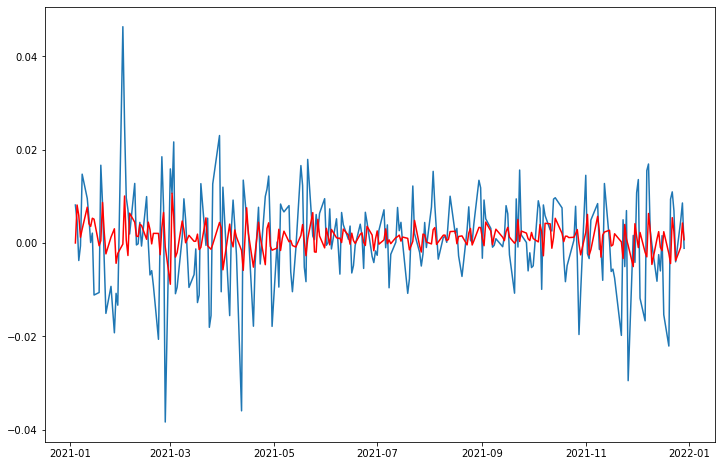

In [34]:
mod = sm.tsa.arima.ARIMA(ts_log_diff, order=(2, 1, 3))
res1 = mod.fit()
print(res1.summary())
fig = plt.figure(figsize=(12,8))
plt.plot(ts_log_diff)
plt.plot(res1.fittedvalues, color='red')

In [35]:
##Making fitted values in series
ARIMA_diff_pred = pd.Series(res.fittedvalues, copy=True)
print(ARIMA_diff_pred.head())

#taking cumulative sum of fitted values
ARIMA_diff_pred_cumsum = ARIMA_diff_pred.cumsum()
print(ARIMA_diff_pred_cumsum.head())

#adding it to reverse the differecing step
ARIMA_log_pred = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_pred = ARIMA_log_pred.add(ARIMA_diff_pred_cumsum,fill_value=0)
print(ARIMA_log_pred.head())

plt.figure(figsize=(12,8))
pred_ARIMA = np.exp(ARIMA_log_pred)

Date
2021-01-04    0.000000
2021-01-05    0.008128
2021-01-06    0.006230
2021-01-07    0.002240
2021-01-08    0.001899
dtype: float64
Date
2021-01-04    0.000000
2021-01-05    0.008128
2021-01-06    0.014358
2021-01-07    0.016598
2021-01-08    0.018497
dtype: float64
Date
2021-01-01    9.548133
2021-01-04    9.548133
2021-01-05    9.556261
2021-01-06    9.562491
2021-01-07    9.564731
dtype: float64


<Figure size 864x576 with 0 Axes>

In [36]:
mse = mean_squared_error(pred_ARIMA, df)
print('MSE: '+str(mse))
mae = mean_absolute_error(pred_ARIMA, df)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(pred_ARIMA, df))
print('RMSE: '+str(rmse))

MSE: 817498.3078522861
MAE: 753.2196686686725
RMSE: 904.156130240948


# Test case 2 for 10 years of data

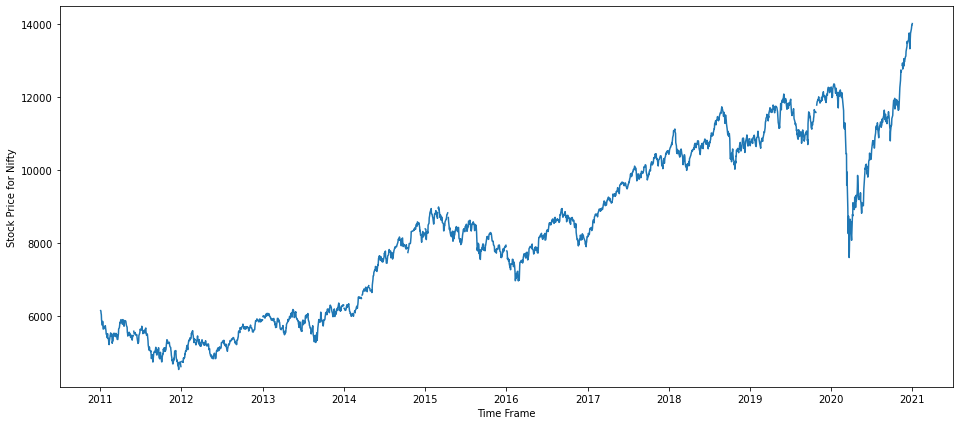

In [37]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for Nifty')
ax1.plot(df1)


In [38]:
df1 =df1.dropna()

In [39]:

from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df1.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)


ADF test statistic: -0.16909358053281567
ADF p-values: 0.9421067068360839
ADF number of lags used: 12
ADF number of observations: 2431
ADF critical values: {'1%': -3.4330428088927842, '5%': -2.862729653823664, '10%': -2.567403301312862}
ADF best information criterion: 28682.525391488223


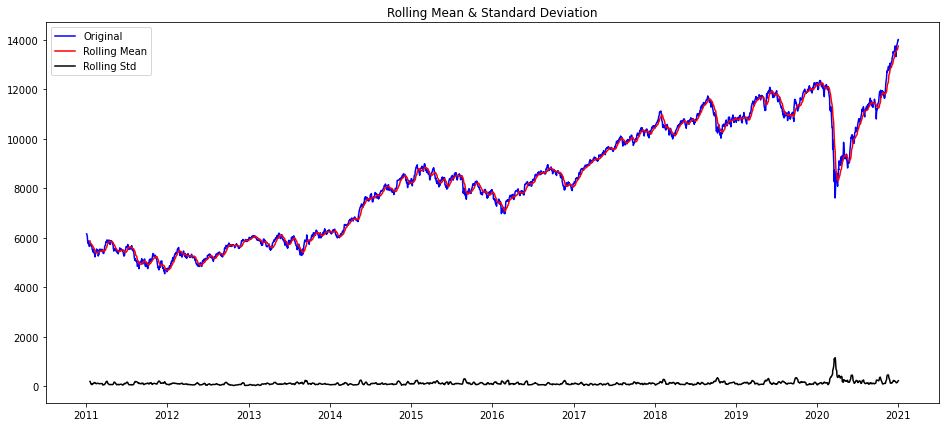

In [40]:
#Determing rolling statistics
rolLmean = df1.rolling(12).mean()
rolLstd = df1.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(df1, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

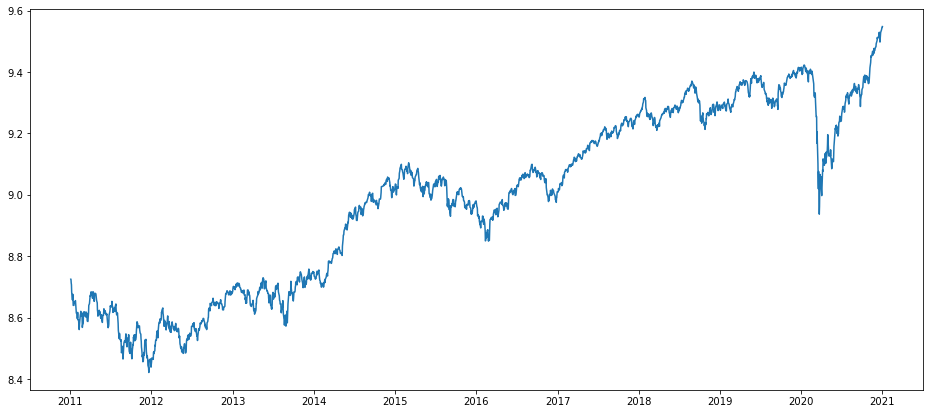

In [41]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log1 = np.log(df1)
plt.plot(ts_log1)

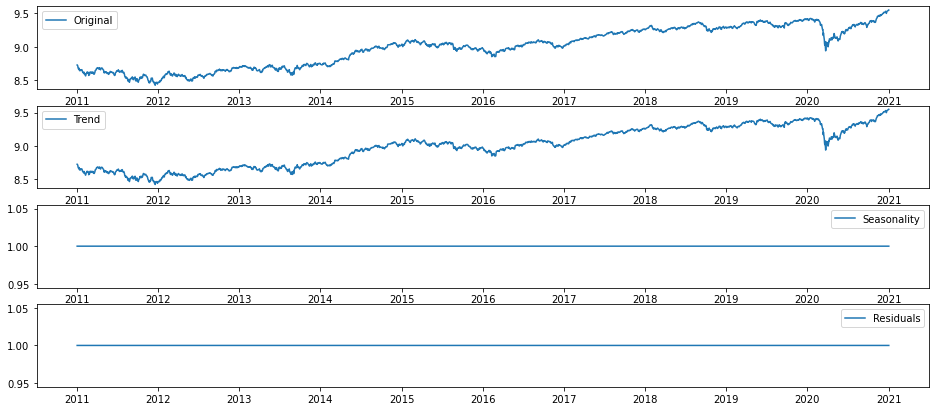

In [42]:

#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log1,period = 1, model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

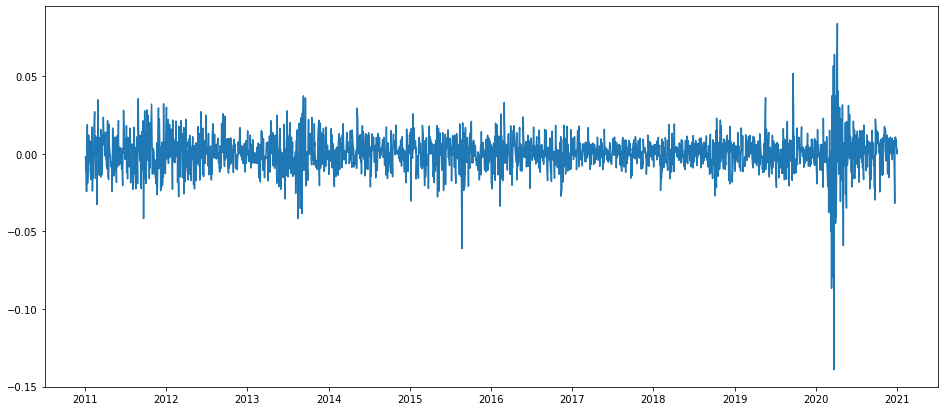

In [43]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log1_diff = ts_log1 - ts_log1.shift()
plt.plot(ts_log1_diff)

#Determing rolling statistics
rolLmean = ts_log1_diff.rolling(12).mean()
rolLstd = ts_log1_diff.rolling(12).std()


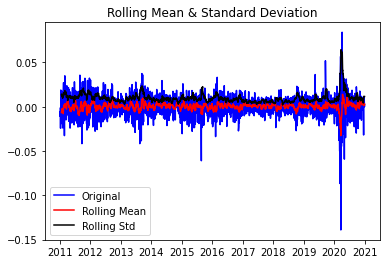

In [44]:

#Plot rolling statistics:
orig = plt.plot(ts_log1_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [45]:

df1.sort_index(inplace=True)

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log1_diff, nlags=20)
lag_pacf = pacf(ts_log1_diff, nlags=20)


C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


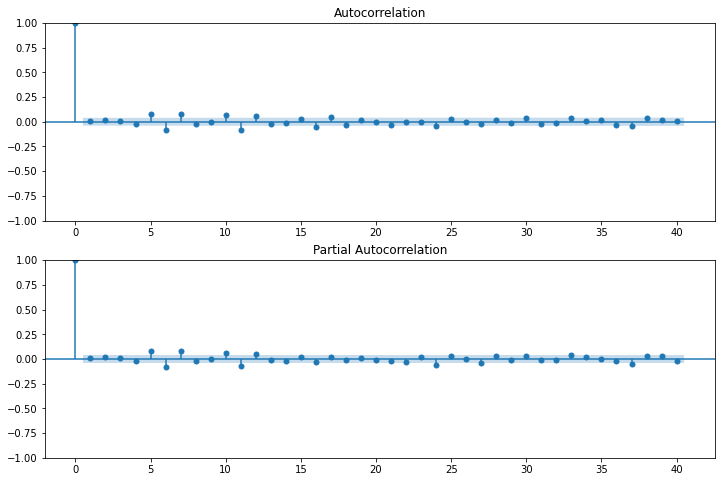

In [46]:

import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log1_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log1_diff.dropna(),lags=40,ax=ax2)

In [47]:
#ts_log_diff.dropna()
ts_log1_diff = ts_log1_diff[~ts_log1_diff.isnull()]

C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregre

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2443
Model:                 ARIMA(5, 1, 5)   Log Likelihood                7483.744
Date:                Fri, 10 Jun 2022   AIC                         -14945.489
Time:                        11:37:48   BIC                         -14881.683
Sample:                             0   HQIC                        -14922.297
                               - 2443                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9378      0.415     -2.260      0.024      -1.751      -0.124
ar.L2         -0.1878      0.491     -0.383      0.702      -1.150       0.774
ar.L3         -0.3854      0.347     -1.111      0.2

C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


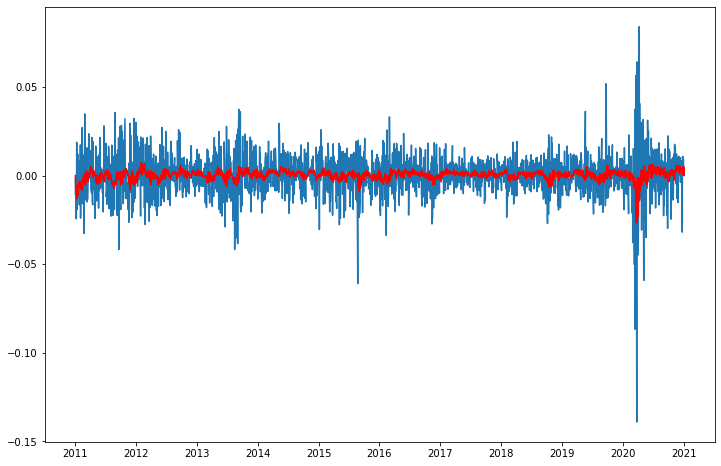

In [48]:
mod_10 = sm.tsa.arima.ARIMA(ts_log1_diff, order=(5, 1, 5))
res_10 = mod_10.fit()
print(res_10.summary())
fig = plt.figure(figsize=(12,8))
plt.plot(ts_log1_diff)
plt.plot(res_10.fittedvalues, color='red')

In [49]:
##Making fitted values in series
ARIMA1_diff_pred = pd.Series(res_10.fittedvalues, copy=True)
print(ARIMA1_diff_pred.head())

#taking cumulative sum of fitted values
ARIMA1_diff_pred_cumsum = ARIMA1_diff_pred.cumsum()
print(ARIMA1_diff_pred_cumsum.head())

#adding it to reverse the differecing step
ARIMA1_log_pred = pd.Series(ts_log1.iloc[0], index=ts_log1.index)
ARIMA1_log_pred = ARIMA1_log_pred.add(ARIMA1_diff_pred_cumsum,fill_value=0)
print(ARIMA1_log_pred.head())

plt.figure(figsize=(12,8))
pred_ARIMA1 = np.exp(ARIMA1_log_pred)

Date
2011-01-04    0.000000
2011-01-05   -0.001829
2011-01-06   -0.006152
2011-01-07   -0.005890
2011-01-10   -0.010267
dtype: float64
Date
2011-01-04    0.000000
2011-01-05   -0.001829
2011-01-06   -0.007981
2011-01-07   -0.013871
2011-01-10   -0.024138
dtype: float64
Date
2011-01-03    8.725442
2011-01-04    8.725442
2011-01-05    8.723614
2011-01-06    8.717462
2011-01-07    8.711572
dtype: float64


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'RMSE: 984.3855')

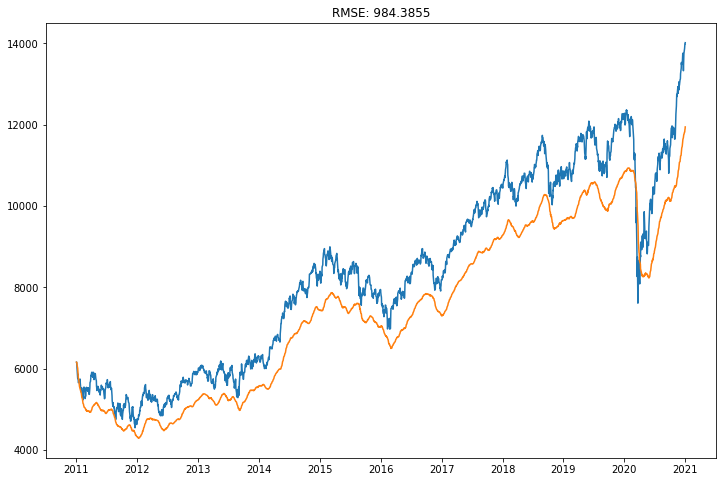

In [50]:
plt.figure(figsize=(12,8))
pred_ARIMA1 = np.exp(ARIMA1_log_pred)
plt.plot(df1)
plt.plot(pred_ARIMA1)
plt.title('RMSE: %.4f'% np.sqrt(sum((pred_ARIMA1-df1)**2)/len(df1)))

In [51]:
mse = mean_squared_error(pred_ARIMA1, df1)
print('MSE: '+str(mse))
mae = mean_absolute_error(pred_ARIMA1, df1)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(pred_ARIMA1, df1))
print('RMSE: '+str(rmse))

MSE: 969014.8587446599
MAE: 909.4403818403706
RMSE: 984.3855234331008


# Calculating the SMA, EMA 


In [361]:
SMA = df

In [362]:
df

Date
2021-01-01    14018.500000
2021-01-04    14132.900391
2021-01-05    14199.500000
2021-01-06    14146.250000
2021-01-07    14137.349609
                  ...     
2021-12-23    17072.599609
2021-12-24    17003.750000
2021-12-27    17086.250000
2021-12-28    17233.250000
2021-12-29    17213.599609
Name: Close, Length: 246, dtype: float64

In [363]:
SMA

Date
2021-01-01    14018.500000
2021-01-04    14132.900391
2021-01-05    14199.500000
2021-01-06    14146.250000
2021-01-07    14137.349609
                  ...     
2021-12-23    17072.599609
2021-12-24    17003.750000
2021-12-27    17086.250000
2021-12-28    17233.250000
2021-12-29    17213.599609
Name: Close, Length: 246, dtype: float64

In [340]:
#red = pred_ARIMA_sma.iloc[0:159]

In [364]:
SMA = SMA.to_frame()

In [365]:
SMA.head()

,Close
Date,
2021-01-01,14018.500000
2021-01-04,14132.900391
2021-01-05,14199.500000
2021-01-06,14146.250000
2021-01-07,14137.349609


In [366]:
SMA['SMA30'] = SMA.rolling(30).mean()

In [367]:
SMA['SMA30']

Date
2021-01-01             NaN
2021-01-04             NaN
2021-01-05             NaN
2021-01-06             NaN
2021-01-07             NaN
                  ...     
2021-12-23    17353.219857
2021-12-24    17324.224870
2021-12-27    17290.341537
2021-12-28    17261.134896
2021-12-29    17234.948242
Name: SMA30, Length: 246, dtype: float64

In [368]:
SMA.dropna(inplace=True)

In [369]:
SMA.count()

Close    217
SMA30    217
dtype: int64

In [370]:
SMA

,Close,SMA30
Date,,
2021-02-12,15163.299805,14496.638314
2021-02-15,15314.700195,14539.844987
2021-02-16,15313.450195,14579.196647
2021-02-17,15208.900391,14612.843327
2021-02-18,15118.950195,14645.266667
...,...,...
2021-12-23,17072.599609,17353.219857
2021-12-24,17003.750000,17324.224870
2021-12-27,17086.250000,17290.341537


<AxesSubplot:xlabel='Date'>

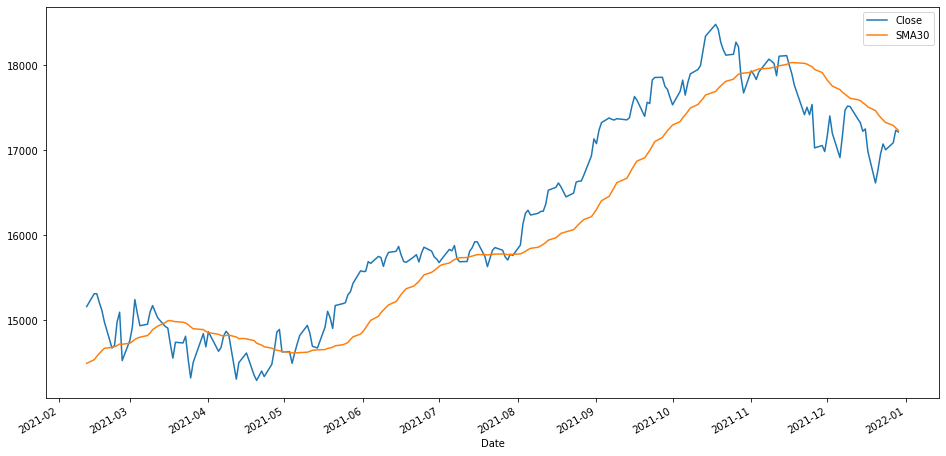

In [371]:
SMA[['Close', 'SMA30']].plot(label='SMA30', 
                                  figsize=(16, 8))

In [372]:
SMA.count()

Close    217
SMA30    217
dtype: int64

In [373]:
SMA

,Close,SMA30
Date,,
2021-02-12,15163.299805,14496.638314
2021-02-15,15314.700195,14539.844987
2021-02-16,15313.450195,14579.196647
2021-02-17,15208.900391,14612.843327
2021-02-18,15118.950195,14645.266667
...,...,...
2021-12-23,17072.599609,17353.219857
2021-12-24,17003.750000,17324.224870
2021-12-27,17086.250000,17290.341537


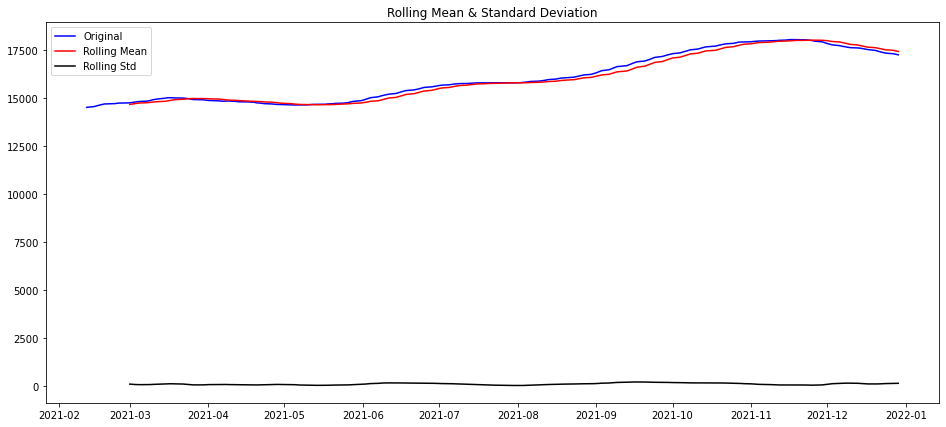

In [374]:
#Determing rolling statistics
rolLmean = SMA['SMA30'].rolling(12).mean()
rolLstd = SMA['SMA30'].rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(SMA['SMA30'], color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

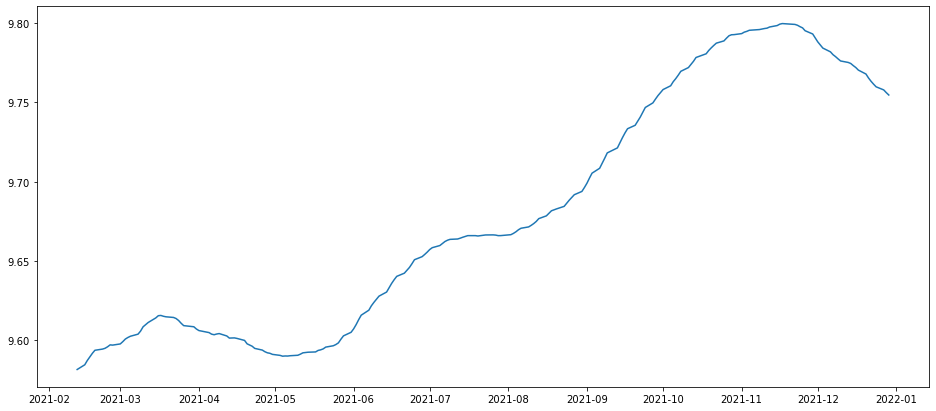

In [375]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log_sma = np.log(SMA['SMA30'])
plt.plot(ts_log_sma)

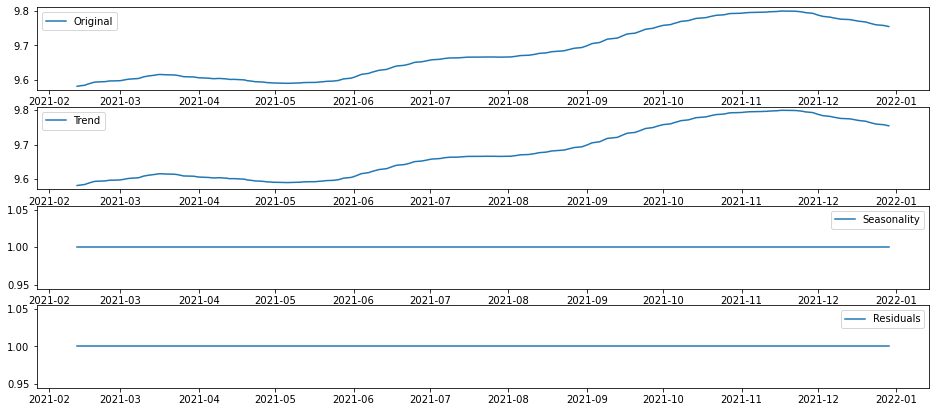

In [376]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log_sma,period = 1, model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log_sma, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

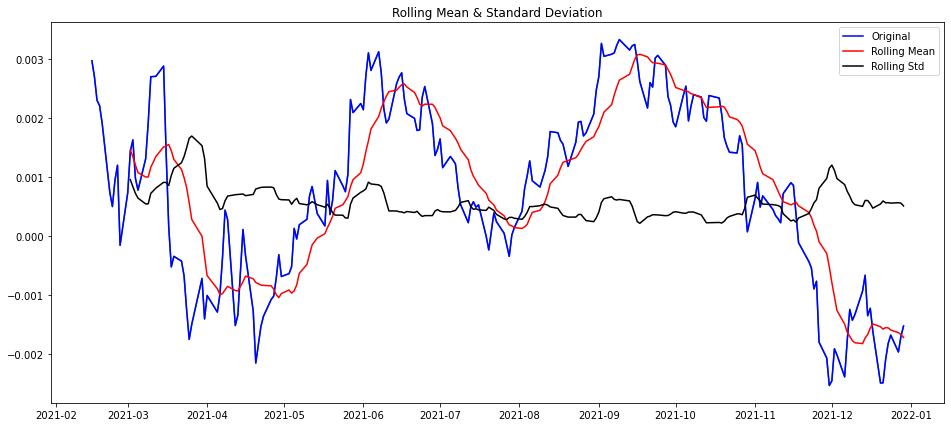

In [377]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_sma_diff = ts_log_sma - ts_log_sma.shift()
plt.plot(ts_log_sma_diff)

#Determing rolling statistics
rolLmean = ts_log_sma_diff.rolling(12).mean()
rolLstd = ts_log_sma_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_sma_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


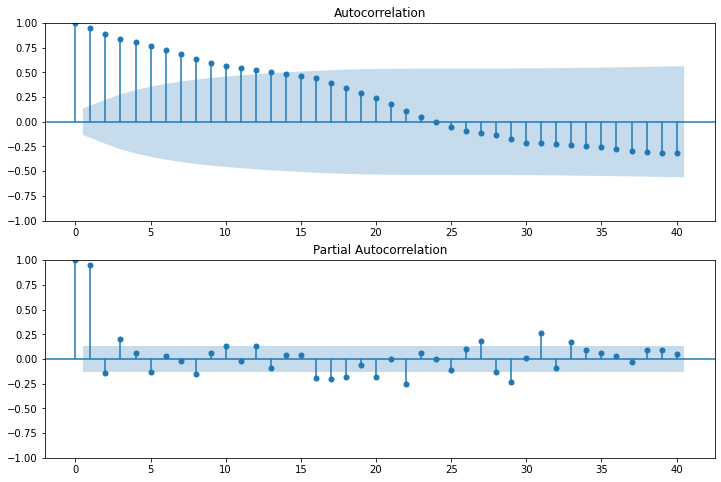

In [378]:
SMA.sort_index(inplace=True)

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_sma_diff, nlags=20)
lag_pacf = pacf(ts_log_sma_diff, nlags=20)


import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_sma_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_sma_diff.dropna(),lags=40,ax=ax2)

                               SARIMAX Results                                
Dep. Variable:                  SMA30   No. Observations:                  216
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1355.349
Date:                Fri, 10 Jun 2022   AIC                          -2704.698
Time:                        02:23:19   BIC                          -2694.586
Sample:                             0   HQIC                         -2700.612
                                - 216                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0584      0.028     -2.097      0.036      -0.113      -0.004
ma.L1          0.1994      0.028      7.010      0.000       0.144       0.255
sigma2      1.957e-07   1.42e-08     13.760      0.0

C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


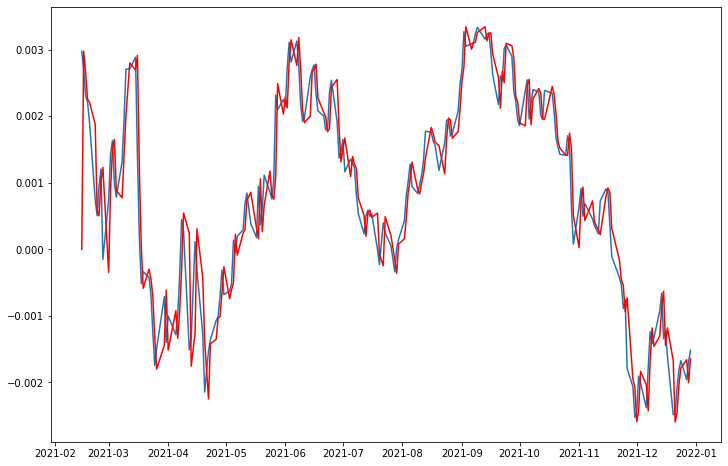

In [380]:
#ts_log_diff.dropna()
ts_log_sma_diff = ts_log_sma_diff[~ts_log_sma_diff.isnull()]

mod_sma = sm.tsa.arima.ARIMA(ts_log_sma_diff, order=(1, 1, 1))
res_sma = mod.fit()
print(res_sma.summary())
fig = plt.figure(figsize=(12,8))
plt.plot(ts_log_sma_diff)
plt.plot(res_sma.fittedvalues, color='red')

In [381]:
##Making fitted values in series
ARIMA_sma_diff_pred = pd.Series(res_sma.fittedvalues, copy=True)
print(ARIMA_sma_diff_pred.head())

#taking cumulative sum of fitted values
ARIMA_sma_diff_pred_cumsum = ARIMA_sma_diff_pred.cumsum()
print(ARIMA_sma_diff_pred_cumsum.head())

#adding it to reverse the differecing step
ARIMA_sma_log_pred = pd.Series(ts_log_sma.iloc[0], index=ts_log_sma.index)
ARIMA_sma_log_pred = ARIMA_sma_log_pred.add(ARIMA_sma_diff_pred_cumsum,fill_value=0)
print(ARIMA_sma_log_pred.head())

plt.figure(figsize=(12,8))
pred_ARIMA_sma = np.exp(ARIMA_sma_log_pred)

Date
2021-02-15    0.000000
2021-02-16    0.002976
2021-02-17    0.002665
2021-02-18    0.002257
2021-02-19    0.002214
dtype: float64
Date
2021-02-15    0.000000
2021-02-16    0.002976
2021-02-17    0.005641
2021-02-18    0.007898
2021-02-19    0.010112
dtype: float64
Date
2021-02-12    9.581672
2021-02-15    9.581672
2021-02-16    9.584648
2021-02-17    9.587313
2021-02-18    9.589570
dtype: float64


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'RMSE: 27.6583')

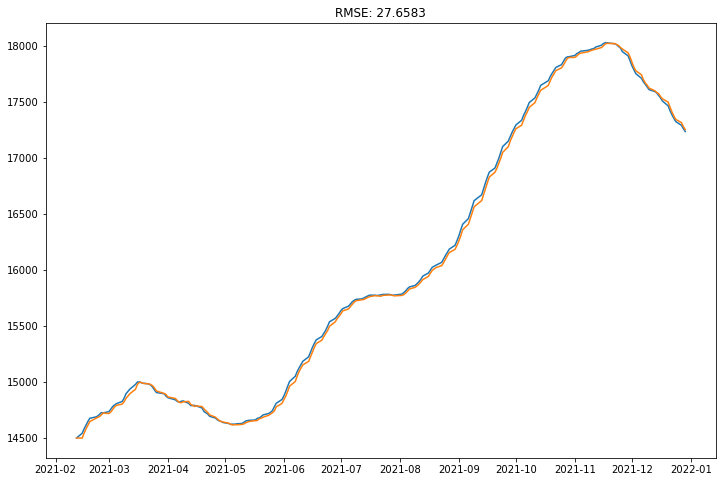

In [382]:
plt.figure(figsize=(12,8))
pred_ARIMA_sma = np.exp(ARIMA_sma_log_pred)
plt.plot(SMA['SMA30'])
plt.plot(pred_ARIMA_sma)
plt.title('RMSE: %.4f'% np.sqrt(sum((pred_ARIMA_sma-SMA['SMA30'])**2)/len(SMA['SMA30'])))

In [390]:
mse = mean_squared_error(pred_ARIMA_sma, SMA['SMA30'])
print('MSE: '+str(mse))
mae = mean_absolute_error(pred_ARIMA_sma, SMA['SMA30'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(pred_ARIMA_sma, SMA['SMA30']))
print('RMSE: '+str(rmse))

MSE: 764.9840537264387
MAE: 23.529641679761045
RMSE: 27.658345101007736


In [383]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [384]:
arimamodel(ts_log_sma)

Performing stepwise search to minimize aic
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=-2711.299, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-2702.561, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-2704.085, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-2706.016, Time=0.12 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-2715.351, Time=0.14 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-2713.070, Time=0.34 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-2714.865, Time=0.12 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=-2712.927, Time=0.33 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-2711.076, Time=0.11 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=-2714.037, Time=0.15 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-2715.092, Time=0.18 sec
 ARIMA(3,2,4)(0,0,0)[0]             : AIC=-2711.021, Time=0.25 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-2714.025, Time=0.74 sec

Best model:  ARIMA(2,2,3)(0,0,0)[0]          
Total fit time: 2.931 seconds


ARIMA(order=(2, 2, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

                               SARIMAX Results                                
Dep. Variable:                  SMA30   No. Observations:                  216
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1355.349
Date:                Fri, 10 Jun 2022   AIC                          -2704.698
Time:                        02:33:47   BIC                          -2694.586
Sample:                             0   HQIC                         -2700.612
                                - 216                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0584      0.028     -2.097      0.036      -0.113      -0.004
ma.L1          0.1994      0.028      7.010      0.000       0.144       0.255
sigma2      1.957e-07   1.42e-08     13.760      0.0

C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


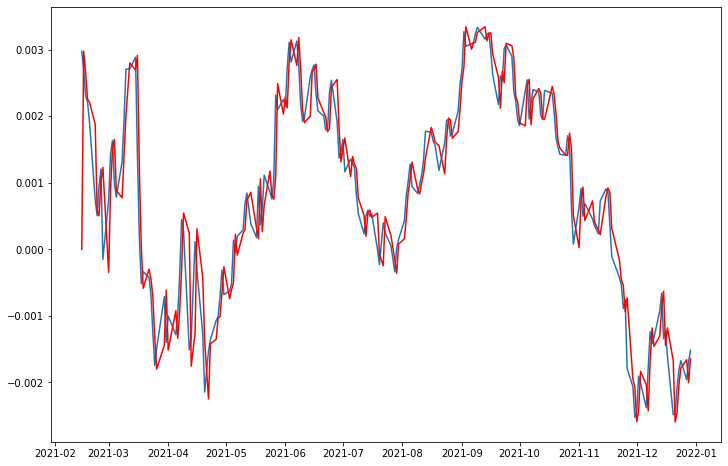

In [385]:
#ts_log_diff.dropna()
ts_log_sma_diff = ts_log_sma_diff[~ts_log_sma_diff.isnull()]

mod_sma1 = sm.tsa.arima.ARIMA(ts_log_sma_diff, order=(2, 2, 3))
res_sma1 = mod.fit()
print(res_sma1.summary())
fig = plt.figure(figsize=(12,8))
plt.plot(ts_log_sma_diff)
plt.plot(res_sma1.fittedvalues, color='red')

In [386]:
##Making fitted values in series
ARIMA_sma1_diff_pred = pd.Series(res_sma1.fittedvalues, copy=True)
print(ARIMA_sma1_diff_pred.head())

#taking cumulative sum of fitted values
ARIMA_sma1_diff_pred_cumsum = ARIMA_sma1_diff_pred.cumsum()
print(ARIMA_sma1_diff_pred_cumsum.head())

#adding it to reverse the differecing step
ARIMA_sma1_log_pred = pd.Series(ts_log_sma.iloc[0], index=ts_log_sma.index)
ARIMA_sma1_log_pred = ARIMA_sma1_log_pred.add(ARIMA_sma1_diff_pred_cumsum,fill_value=0)
print(ARIMA_sma1_log_pred.head())

plt.figure(figsize=(12,8))
pred_ARIMA_sma1 = np.exp(ARIMA_sma1_log_pred)

Date
2021-02-15    0.000000
2021-02-16    0.002976
2021-02-17    0.002665
2021-02-18    0.002257
2021-02-19    0.002214
dtype: float64
Date
2021-02-15    0.000000
2021-02-16    0.002976
2021-02-17    0.005641
2021-02-18    0.007898
2021-02-19    0.010112
dtype: float64
Date
2021-02-12    9.581672
2021-02-15    9.581672
2021-02-16    9.584648
2021-02-17    9.587313
2021-02-18    9.589570
dtype: float64


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'RMSE: 27.6583')

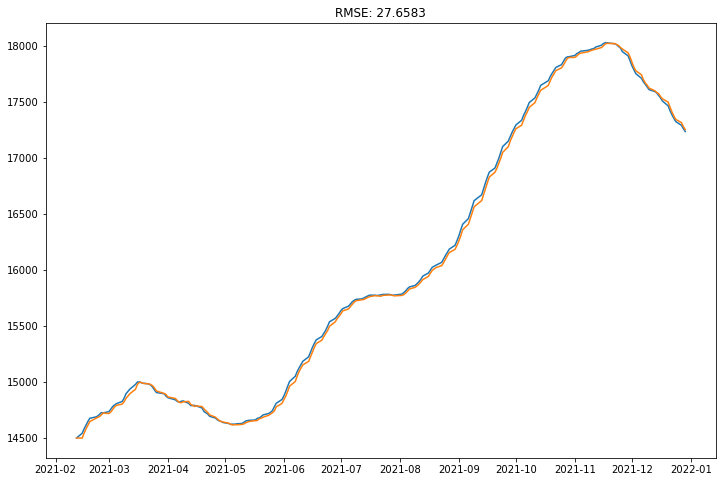

In [387]:
plt.figure(figsize=(12,8))
pred_ARIMA_sma1 = np.exp(ARIMA_sma1_log_pred)
plt.plot(SMA['SMA30'])
plt.plot(pred_ARIMA_sma1)
plt.title('RMSE: %.4f'% np.sqrt(sum((pred_ARIMA_sma1-SMA['SMA30'])**2)/len(SMA['SMA30'])))

In [228]:
EMA = df

In [229]:
EMA.head()

Date
2021-01-01    14018.500000
2021-01-04    14132.900391
2021-01-05    14199.500000
2021-01-06    14146.250000
2021-01-07    14137.349609
Name: Close, dtype: float64

In [231]:
EMA = EMA.to_frame()

In [315]:
EMA

,Close,EWMA30
Date,,
2021-01-01,14018.500000,14018.500000
2021-01-04,14132.900391,14077.606869
2021-01-05,14199.500000,14120.975732
2021-01-06,14146.250000,14127.939714
2021-01-07,14137.349609,14130.080693
...,...,...
2021-12-23,17072.599609,17300.931435
2021-12-24,17003.750000,17281.758437
2021-12-27,17086.250000,17269.144989


In [232]:
EMA['EWMA30'] = EMA.ewm(span=30).mean()

In [233]:
EMA['EWMA30']

Date
2021-01-01    14018.500000
2021-01-04    14077.606869
2021-01-05    14120.975732
2021-01-06    14127.939714
2021-01-07    14130.080693
                  ...     
2021-12-23    17300.931435
2021-12-24    17281.758437
2021-12-27    17269.144989
2021-12-28    17266.829183
2021-12-29    17263.395016
Name: EWMA30, Length: 246, dtype: float64

<AxesSubplot:xlabel='Date'>

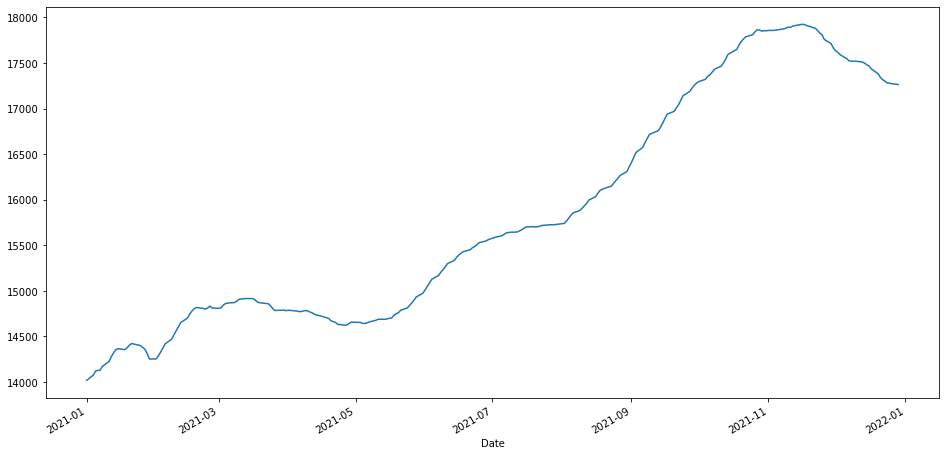

In [296]:
EMA['EWMA30'].plot(label='EMA',
                                   figsize=(16, 8))

In [297]:
EMA.count()

Close     246
EWMA30    246
dtype: int64

In [298]:
EMA

,Close,EWMA30
Date,,
2021-01-01,14018.500000,14018.500000
2021-01-04,14132.900391,14077.606869
2021-01-05,14199.500000,14120.975732
2021-01-06,14146.250000,14127.939714
2021-01-07,14137.349609,14130.080693
...,...,...
2021-12-23,17072.599609,17300.931435
2021-12-24,17003.750000,17281.758437
2021-12-27,17086.250000,17269.144989


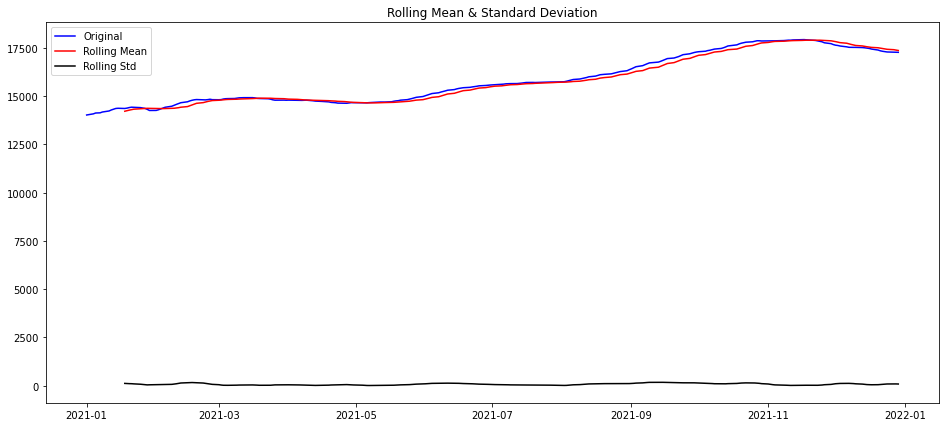

In [299]:
#Determing rolling statistics
rolLmean = EMA['EWMA30'].rolling(12).mean()
rolLstd = EMA['EWMA30'].rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(EMA['EWMA30'], color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

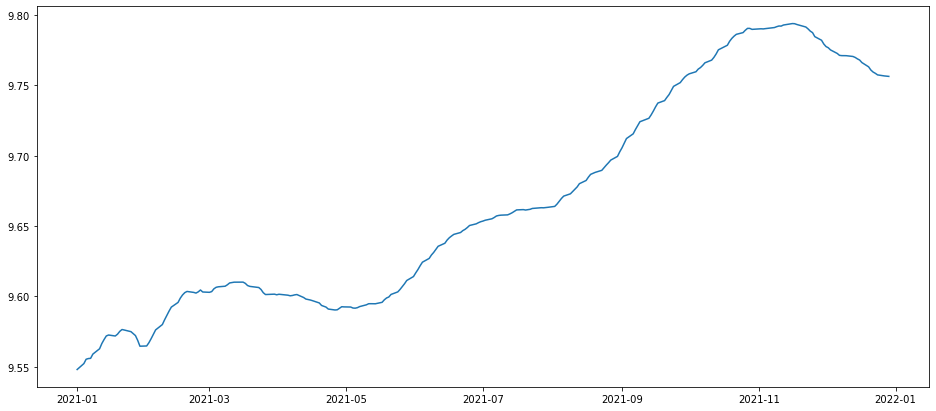

In [300]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log_ema = np.log(EMA['EWMA30'])
plt.plot(ts_log_ema)

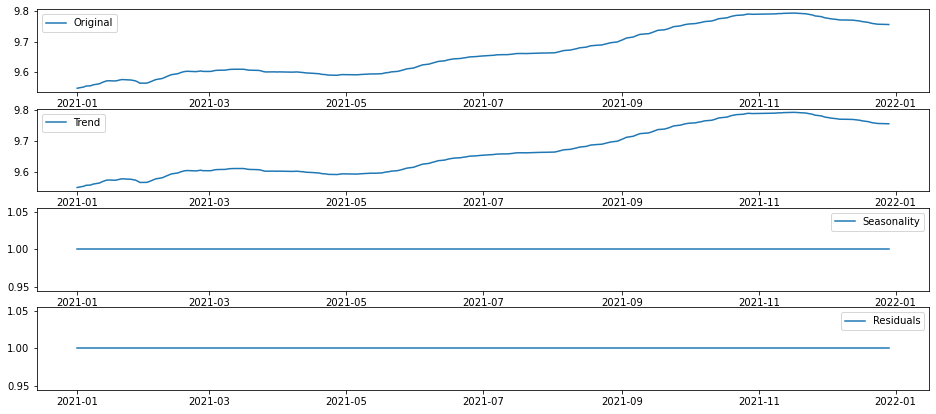

In [301]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log_ema,period = 1, model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log_ema, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

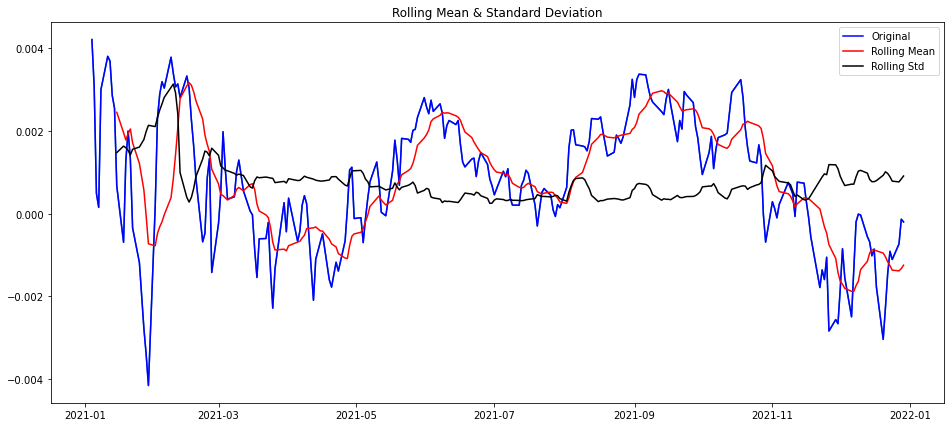

In [302]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_ema_diff = ts_log_ema - ts_log_ema.shift()
plt.plot(ts_log_ema_diff)

#Determing rolling statistics
rolLmean = ts_log_ema_diff.rolling(10).mean()
rolLstd = ts_log_ema_diff.rolling(10).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_ema_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


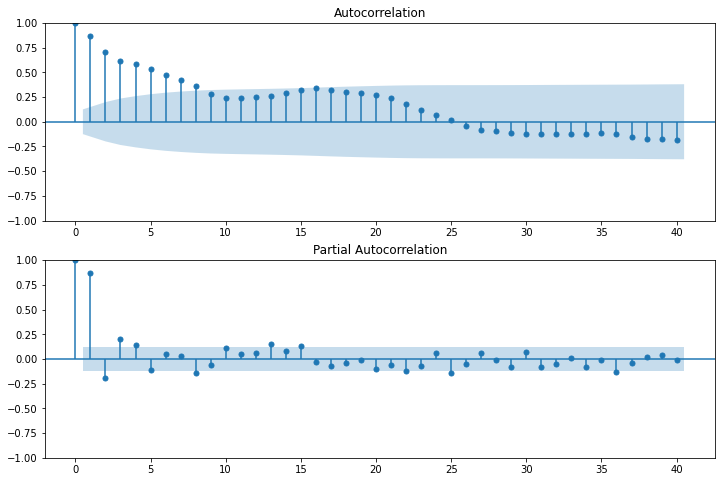

In [304]:
EMA.sort_index(inplace=True)

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_ema_diff, nlags=20)
lag_pacf = pacf(ts_log_ema_diff, nlags=20)


import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_ema_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_ema_diff.dropna(),lags=40,ax=ax2)

C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 EWMA30   No. Observations:                  245
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1402.891
Date:                Fri, 10 Jun 2022   AIC                          -2799.781
Time:                        01:39:29   BIC                          -2789.290
Sample:                             0   HQIC                         -2795.556
                                - 245                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3489      0.467      0.747      0.455      -0.567       1.265
ma.L1         -0.2418      0.476     -0.508      0.612      -1.175       0.691
sigma2      5.938e-07   3.72e-08     15.971      0.0

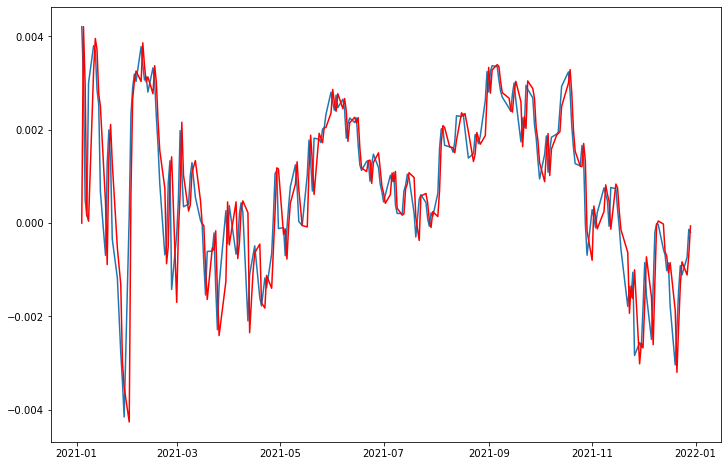

In [305]:
#ts_log_diff.dropna()
ts_log_ema_diff = ts_log_ema_diff[~ts_log_ema_diff.isnull()]

mod = sm.tsa.arima.ARIMA(ts_log_ema_diff, order=(1, 1, 1))
res_ema = mod.fit()
print(res_ema.summary())
fig = plt.figure(figsize=(12,8))
plt.plot(ts_log_ema_diff)
plt.plot(res_ema.fittedvalues, color='red')

In [306]:
##Making fitted values in series
ARIMA_ema_diff_pred = pd.Series(res_ema.fittedvalues, copy=True)
print(ARIMA_ema_diff_pred.head())

#taking cumulative sum of fitted values
ARIMA_ema_diff_pred_cumsum = ARIMA_ema_diff_pred.cumsum()
print(ARIMA_ema_diff_pred_cumsum.head())

#adding it to reverse the differecing step
ARIMA_ema_log_pred = pd.Series(ts_log_ema.iloc[0], index=ts_log_ema.index)
ARIMA_ema_log_pred = ARIMA_ema_log_pred.add(ARIMA_ema_diff_pred_cumsum,fill_value=0)
print(ARIMA_ema_log_pred.head())

plt.figure(figsize=(12,8))
pred_ARIMA_ema = np.exp(ARIMA_ema_log_pred)

Date
2021-01-04    0.000000
2021-01-05    0.004207
2021-01-06    0.002951
2021-01-07    0.000186
2021-01-08    0.000041
dtype: float64
Date
2021-01-04    0.000000
2021-01-05    0.004207
2021-01-06    0.007159
2021-01-07    0.007344
2021-01-08    0.007385
dtype: float64
Date
2021-01-01    9.548133
2021-01-04    9.548133
2021-01-05    9.552341
2021-01-06    9.555292
2021-01-07    9.555477
dtype: float64


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'RMSE: 30.1302')

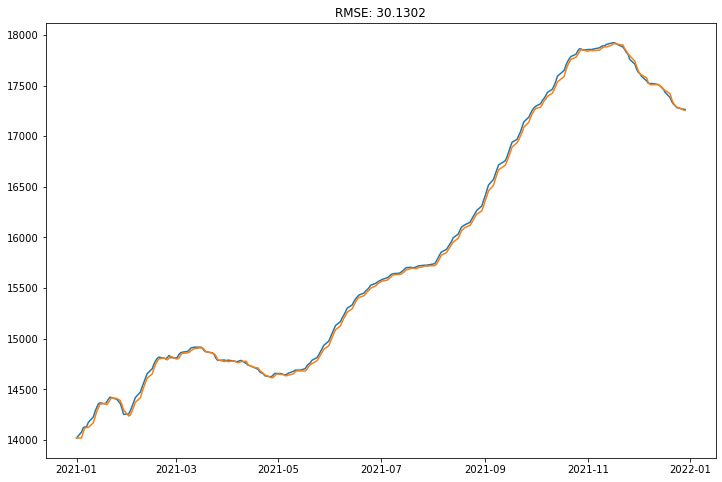

In [316]:
plt.figure(figsize=(12,8))
pred_ARIMA_ema = np.exp(ARIMA_ema_log_pred)
plt.plot(EMA['EWMA30'])
plt.plot(pred_ARIMA_ema)
plt.title('RMSE: %.4f'% np.sqrt(sum((pred_ARIMA_ema-EMA['EWMA30'])**2)/len(EMA['EWMA30'])))

In [391]:
mse = mean_squared_error(pred_ARIMA_ema, EMA['EWMA30'])
print('MSE: '+str(mse))
mae = mean_absolute_error(pred_ARIMA_ema, EMA['EWMA30'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(pred_ARIMA_ema, EMA['EWMA30']))
print('RMSE: '+str(rmse))

MSE: 907.8277701202262
MAE: 25.482249717360723
RMSE: 30.130180386453485
